In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

## Word Clouds
We propose to implement a wordcloud video, where we compute one word cloud per time point, and then we create a video from all the different word clouds, that will illustrate the evolution of the word set over time.

We also implement a smoothing on the data so that the wordcloud is a little bit more constant. If the time series have to many up and downs the resulting word cloud will make no sense. We tried to do the word cloud per month, but it was too variable. We choose here to measure the counts per year, and then smooth the time series (rolling mean).

In [2]:
wordYear = pd.read_csv('Data/3kPluswordPerYear.csv',index_col=0)
wordYear = wordYear.rolling(window=24,center=True).mean()
wordYear.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1805-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1806-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
words = wordYear.columns.astype(str)
 numWords2 = wordYear.loc[wordYear.index[101]].values

We first generate two word clouds from two consecutive years.

In [15]:
listWords = []
listWords2 = []
for counter,i in enumerate(words):
    listWords.append(str(str(i)+' ')*numWords[counter])
    listWords2.append(str(str(i)+' ')*numWords2[counter])

/Users/thomas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/thomas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [16]:
test = ' '.join(listWords)
test2 = ' '.join(listWords2)

In [40]:
from wordcloud import WordCloud

In [18]:
wordcloud = WordCloud().generate(test)
wordcloud2 = WordCloud().generate(test2)

We first show the two word clouds that were computed separately.

(-0.5, 399.5, 199.5, -0.5)

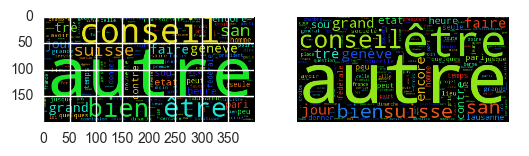

In [19]:
plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.subplot(1,2,2)
plt.imshow(wordcloud2)
plt.axis("off")


What can be seen here is that the same word does not have the same color, and the same words appear at different places on the word cloud. Therefore we have to keep the position of the words in the first word cloud and add them to the other word cloud.

In [20]:
for i in range(len(wordcloud2.layout_)):
    word = wordcloud2.layout_[i][0][0]
    for j in range(len(wordcloud.layout_)):
        otherWord = wordcloud.layout_[j][0][0]
        if otherWord == word:
            wordcloud2.layout_[i] = list(wordcloud2.layout_[i])
            wordcloud2.layout_[i][2:] = list(wordcloud.layout_[j][2:])
            wordcloud2.layout_[i] = tuple(wordcloud2.layout_[i])
            break

Now that we have done that we can look at the two onsecutive word clouds.

(-0.5, 399.5, 199.5, -0.5)

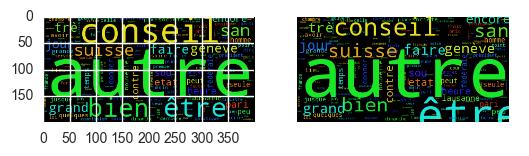

In [21]:
plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.subplot(1,2,2)
plt.imshow(wordcloud2)
plt.axis("off")


We see that we succeeded to keep the position and the color of each word between the two word cloud. Bun unfortunately the top 200 words in two succesive years change too much, therefore we have too many words that overlap and the cloud becomes not clear at all.

Based on this result we see that a word cloud video will not be very interesting as everything will overlap with each other,

To solve this problem we will try to take the n most frequent words, choose a subset that is always present, and then put their word count. This would be not completely representative of the reality, but could be a nice proxy that would not be too noisy.

In [5]:
wordYear = pd.read_csv('Data/3kPluswordPerYear.csv',index_col=0)
wordYear.index = pd.to_datetime(wordYear.index)
yearIndex = wordYear.index.values

In [34]:
setMostFrequent = []

for i in range(10,len(yearIndex)):
    rankYear = wordYear.loc[wordYear.index[i]]\
    .sort_values(ascending=False)
    wordRank = rankYear.index.values[0:844]
    numRank = np.arange(1,len(wordRank)+1)
    rankDF = pd.DataFrame(data=numRank,
                          index=wordRank, 
                          columns=[wordYear.index[i]])
    setMostFrequent.append(rankDF)
    
dfMostFrequent = pd.concat(setMostFrequent,axis=1)

We look at how many words are always in this dataset.

In [35]:
wordAlways = dfMostFrequent.dropna(axis=0)
print(wordAlways.shape)
wordAlways.head()

(200, 187)


,1812-01-01 00:00:00,1813-01-01 00:00:00,1814-01-01 00:00:00,1815-01-01 00:00:00,1816-01-01 00:00:00,1817-01-01 00:00:00,1818-01-01 00:00:00,1819-01-01 00:00:00,1820-01-01 00:00:00,1821-01-01 00:00:00,...,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00
actuelle,308.0,264.0,350.0,347.0,282.0,277.0,345.0,342.0,390.0,327.0,...,153.0,167.0,170.0,165.0,200.0,262.0,280.0,306.0,309.0,471.0
affairer,365.0,369.0,233.0,283.0,432.0,342.0,221.0,215.0,158.0,121.0,...,87.0,80.0,82.0,121.0,132.0,133.0,139.0,146.0,149.0,151.0
ancien,753.0,616.0,235.0,368.0,205.0,261.0,290.0,251.0,361.0,438.0,...,361.0,371.0,373.0,384.0,411.0,405.0,408.0,400.0,415.0,459.0
anner,159.0,279.0,248.0,226.0,175.0,96.0,160.0,149.0,258.0,315.0,...,31.0,30.0,25.0,25.0,30.0,34.0,38.0,44.0,48.0,81.0
années,487.0,589.0,453.0,525.0,390.0,346.0,381.0,351.0,477.0,516.0,...,102.0,109.0,104.0,97.0,81.0,86.0,78.0,89.0,89.0,97.0


Now we select the time serie of these words.

In [36]:
wordMostFrequ = wordAlways.index.values
dfWithMostF = wordYear[wordMostFrequ]
dfWithMostF.shape

(197, 200)

Now we will implement the word cloud that was done with the method described above.

We start by generating the first word cloud:

In [51]:
words = dfWithMostF.columns.astype(str)
numWords = dfWithMostF.loc[dfWithMostF.index[0]].values

listWords = []
for counter,i in enumerate(words):
    listWords.append(str(str(i)+' ')*numWords[counter])

test = ' '.join(listWords)
wordcloud = WordCloud().generate(test)
wordcloud.to_file('Images/yearo_0.png')
#plt.imsave('Images/year_0.png',wordcloud.to_file)

/Users/thomas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Now we generate each wordcloud based on the corrdinates of the first one.

In [57]:
for k in np.arange(1,len(dfWithMostF)):
    numWordsi = dfWithMostF.loc[dfWithMostF.index[k]].values
    listWordsi = []
    
    for counter,i in enumerate(words):
        listWordsi.append(str(str(i)+' ')*numWordsi[counter])

    testi = ' '.join(listWordsi)
    wordcloudi = WordCloud().generate(testi)
    
    for i in range(len(wordcloudi.layout_)):
        wordi = wordcloudi.layout_[i][0][0]
        for j in range(len(wordcloud.layout_)):
            otherWord = wordcloud.layout_[j][0][0]
            if otherWord == wordi:
                wordcloudi.layout_[i] = list(wordcloudi.layout_[i])
                wordcloudi.layout_[i][2:] = list(wordcloud.layout_[j][2:])
                wordcloudi.layout_[i] = tuple(wordcloudi.layout_[i])
                break
    
    wordcloudi.to_file('Images/yearo_'+str(dfWithMostF.index[k])+'.png')


/Users/thomas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


And we try to generate a gif.

In [73]:
import imageio
images = []
for filename in os.listdir('Images/'):
    if filename.endswith('.png'):
        images.append(imageio.imread('Images/'+filename))
imageio.mimsave('movie.gif', images, **{ 'duration': 100 })

In [74]:
from IPython.display import Image
Image(url='movie.gif')  

So we can see that it's still very noisy but it's fun to look at!